In [1]:
import pandas as pd
df=pd.read_csv("AFTER SPLIT.csv")
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [2]:
df.shape

(165474, 14)

In [3]:
df.count

<bound method DataFrame.count of         year  month  day  order  country  session ID  page 1 (main category)  \
0       2008      4    1      1       29           1                       1   
1       2008      4    1      2       29           1                       1   
2       2008      4    1      3       29           1                       2   
3       2008      4    1      4       29           1                       2   
4       2008      4    1      5       29           1                       2   
...      ...    ...  ...    ...      ...         ...                     ...   
165469  2008      8   13      1       29       24024                       2   
165470  2008      8   13      1        9       24025                       1   
165471  2008      8   13      1       34       24026                       1   
165472  2008      8   13      2       34       24026                       3   
165473  2008      8   13      3       34       24026                       2   

      

In [4]:
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'price 2', 'page'],
      dtype='object')

In [5]:
df.dtypes

year                        int64
month                       int64
day                         int64
order                       int64
country                     int64
session ID                  int64
page 1 (main category)      int64
page 2 (clothing model)    object
colour                      int64
location                    int64
model photography           int64
price                       int64
price 2                     int64
page                        int64
dtype: object

In [6]:
df.drop(["page 1 (main category)","page 2 (clothing model)","session ID"],axis=1,inplace=True)
df.describe

<bound method NDFrame.describe of         year  month  day  order  country  colour  location  model photography  \
0       2008      4    1      1       29       1         5                  1   
1       2008      4    1      2       29       1         6                  1   
2       2008      4    1      3       29      10         2                  1   
3       2008      4    1      4       29       6         6                  2   
4       2008      4    1      5       29       4         3                  2   
...      ...    ...  ...    ...      ...     ...       ...                ...   
165469  2008      8   13      1       29       2         4                  1   
165470  2008      8   13      1        9       3         4                  1   
165471  2008      8   13      1       34       3         1                  1   
165472  2008      8   13      2       34      12         1                  1   
165473  2008      8   13      3       34       3         1                 

In [7]:
#Checking for NULL enteries
df.isnull().sum()

year                 0
month                0
day                  0
order                0
country              0
colour               0
location             0
model photography    0
price                0
price 2              0
page                 0
dtype: int64

In [8]:
#Checking for zero variance
import numpy as np

var_full = np.var(df)
print(var_full)

year                   0.000000
month                  1.763998
day                   77.975034
order                181.666475
country               51.132072
colour                17.940250
location               2.935056
model photography      0.192434
price                157.454645
price 2                0.249860
page                   0.965128
dtype: float64


Here the year feature is a zero variance
Hence It should be removed

In [10]:
df.drop('year', inplace=True, axis=1)
#here inplace is used to referesh the data frame but not the orignal .csv file.
#axis=1 implies it is a feature/column if axis =0 means it is a record/row

In [11]:
df.describe()

,month,day,order,country,colour,location,model photography,price,price 2,page
count,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,5.585887,14.524554,9.817476,26.952621,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,1.328160,8.830374,13.478411,7.150691,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,4.000000,7.000000,2.000000,29.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,5.000000,14.000000,6.000000,29.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,7.000000,22.000000,12.000000,29.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,8.000000,31.000000,195.000000,47.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


<AxesSubplot:ylabel='order'>

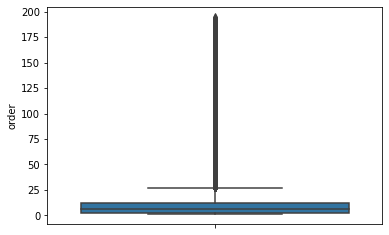

In [12]:
import seaborn as sns
sns.boxplot(y = df.order)

C:\Users\rcman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order', ylabel='Density'>

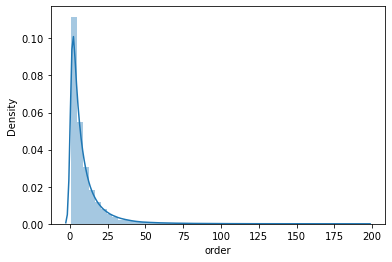

In [13]:
import seaborn as sns
import matplotlib as plt
sns.distplot(df.order)

In [14]:
import numpy as np
import pandas as pd 
import scipy.stats as stats

#find Q1, Q3, and interquartile range for each column
Q1 = (df.quantile(q=.25))
Q3 = (df.quantile(q=.75))
IQR = (df.apply(stats.iqr))

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(115376, 10)

In [15]:
import IQR
df=IQR.out_iqr(df,"order")

The IQR is 10.0
The lower bound value is -13.0
The upper bound value is 27.0
Total number of outliers are 11523


In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats
ax=stats.zscore(df.order)
ax

318      -0.779048
319      -0.738342
320      -0.697636
321      -0.656930
322      -0.616224
            ...   
165381    0.401425
165382    0.442131
165383    0.482837
165384    0.523543
165385    0.564249
Name: order, Length: 11523, dtype: float64

In [26]:
import zscore
zscore.z_score(df,df.order,5)

AttributeError: 'DataFrame' object has no attribute 'column'

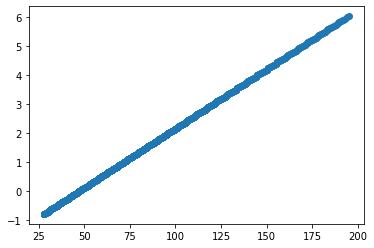

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df.order, ax)

In [19]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
c = np.column_stack((df.day, df.order))
clf = LocalOutlierFactor(n_neighbors=2)
clf.fit_predict(c)

array([1, 1, 1, ..., 1, 1, 1])